Alex Medina | Problem Set #8

In [1]:
#General imports
import math as m
import numpy as np
import matplotlib.pyplot as plt

#ML imports
import sklearn.tree as tree
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn import svm

In [2]:
#Reading RR Lyrae dataset
X = np.genfromtxt("RRLyrae_features.txt", delimiter=',')
Y = np.genfromtxt("RRLyrae_labels.txt")

In [3]:
#Characterizing data (stragith from the problem set)
print('X, Y shapes:', X.shape, Y.shape)
print(len(Y))
print(X,Y)

X, Y shapes: (93141, 4) (93141,)
93141
[[ 0.39400032  1.25099932  0.13700032  0.06199932]
 [ 0.33900132  1.04800032  0.15199932  0.02300132]
 [ 0.34199932  1.00800132  0.12900032  0.20300132]
 ...
 [ 0.21200032  1.04400132  0.03500032  0.00200132]
 [ 0.17200132  1.06499932  0.04200032  0.00300032]
 [ 0.06500132  1.12599932 -0.01700032 -0.05799932]] [0. 0. 0. ... 1. 1. 1.]


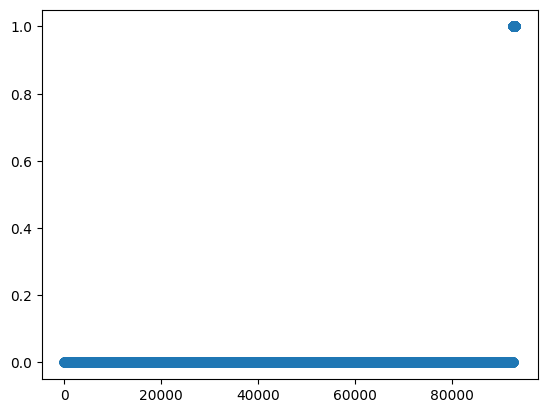

In [4]:
plt.scatter(range(len(Y)), Y)

(23286, 4) (69855, 4)


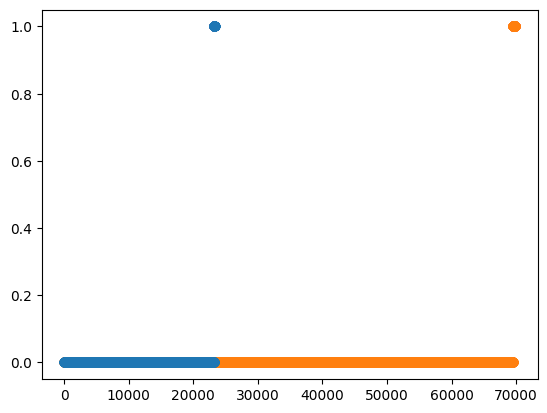

In [5]:
#Training data on both kinds of stars
#Every fourth dtsr to be a test set

Xtest = X[::4, 0:4]
Ytest = Y[::4]
#Make sure these points are on top
plt.scatter(range(len(Ytest)), Ytest, zorder=2)

#Delete points following this pattern using s_
Xtrain = np.delete(X,np.s_[::4], axis = 0)
Ytrain = np.delete(Y,np.s_[::4])   
plt.scatter(range(len(Ytrain)), Ytrain, zorder=1)
print(Xtest.shape, Xtrain.shape)

**Problem 1:**

- Using a decision tree classifier to classify this data using the colors as a predictor for the label.
- Compute some measure of the precision.

[Text(0.6196563972320377, 0.9736842105263158, 'x[0] <= 0.209\ngini = 0.01\nsamples = 69855\nvalue = [69493, 362]'),
 Text(0.3198781654888104, 0.9210526315789473, 'x[1] <= 1.091\ngini = 0.206\nsamples = 2905\nvalue = [2567, 338]'),
 Text(0.469767281360424, 0.9473684210526316, 'True  '),
 Text(0.1404004711425206, 0.868421052631579, 'x[1] <= 1.059\ngini = 0.048\nsamples = 1642\nvalue = [1602, 40]'),
 Text(0.07938751472320377, 0.8157894736842105, 'x[1] <= 0.995\ngini = 0.026\nsamples = 1430\nvalue = [1411, 19]'),
 Text(0.0480565371024735, 0.7631578947368421, 'x[0] <= 0.121\ngini = 0.01\nsamples = 1021\nvalue = [1016, 5]'),
 Text(0.028268551236749116, 0.7105263157894737, 'x[0] <= 0.12\ngini = 0.031\nsamples = 189\nvalue = [186, 3]'),
 Text(0.01884570082449941, 0.6578947368421053, 'x[2] <= 0.044\ngini = 0.021\nsamples = 186\nvalue = [184, 2]'),
 Text(0.011307420494699646, 0.6052631578947368, 'x[0] <= 0.102\ngini = 0.012\nsamples = 163\nvalue = [162, 1]'),
 Text(0.007538280329799764, 0.552631

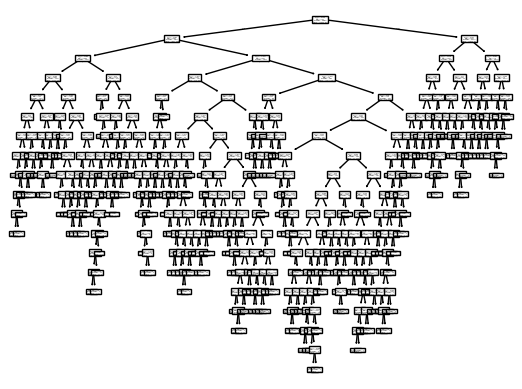

In [6]:
#Decision tree classifier
dtree=tree.DecisionTreeClassifier()
dtree = dtree.fit(Xtrain, Ytrain)
tree.plot_tree(dtree)

In [8]:
#For the pset, accuracy score
cross_val_score(dtree, X, Y, cv=5)

array([0.99414891, 0.9947391 , 0.99549066, 0.99586644, 0.99366545])

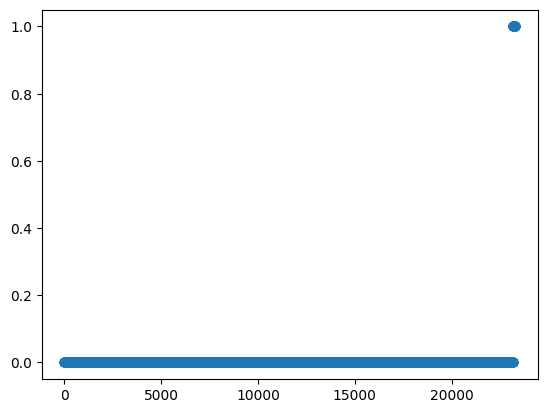

In [10]:
#Plotting again for visualiation
Yfit = dtree.predict(Xtest)
#Comparing
plt.scatter(range(len(Yfit)), Ytest)

In [11]:
#Many false positives

def truth_table(Yfit, Ytest):
    
    print('Test size: ',len(Yfit), 'Number of RR Lyrae stars: ',len(np.where(Ytest==1)[0]),'\n')

    RR_good = len(np.where(np.logical_and(Yfit == 1, Ytest == 1))[0])
    RR_bad  = len(np.where(np.logical_and(Yfit == 1, Ytest == 0))[0])
    MS_good = len(np.where(np.logical_and(Yfit == 0, Ytest == 0))[0])
    MS_bad  = len(np.where(np.logical_and(Yfit == 0, Ytest == 1))[0])

    label = ('Good','Bad')

    print('          ', f'{label[0]:>6}', f'{label[1]:>6}')
    print('RR Lyrae: ', f'{RR_good :6}', f'{RR_bad  :6}')
    print('  others: ', f'{MS_good :6}', f'{MS_bad  :6}')
    return

truth_table(Yfit, Ytest)

Test size:  23286 Number of RR Lyrae stars:  121 

             Good    Bad
RR Lyrae:      71     67
  others:   23098     50


So, out of all the stars, there are 71 of 121 discovered.

In [13]:
#Alternatively

for i in range(3,10):
    dtreei = tree.DecisionTreeClassifier(max_depth=i)
    dtreei = dtreei.fit(Xtrain, Ytrain)
    Yfiti  = dtreei.predict(Xtest)
    print('max_depth = ',i)
    truth_table(Yfiti, Ytest)
    print('\n')

max_depth =  3
Test size:  23286 Number of RR Lyrae stars:  121 

             Good    Bad
RR Lyrae:       0      0
  others:   23165    121


max_depth =  4
Test size:  23286 Number of RR Lyrae stars:  121 

             Good    Bad
RR Lyrae:      77     74
  others:   23091     44


max_depth =  5
Test size:  23286 Number of RR Lyrae stars:  121 

             Good    Bad
RR Lyrae:      78     70
  others:   23095     43


max_depth =  6
Test size:  23286 Number of RR Lyrae stars:  121 

             Good    Bad
RR Lyrae:      68     54
  others:   23111     53


max_depth =  7
Test size:  23286 Number of RR Lyrae stars:  121 

             Good    Bad
RR Lyrae:      72     55
  others:   23110     49


max_depth =  8
Test size:  23286 Number of RR Lyrae stars:  121 

             Good    Bad
RR Lyrae:      76     70
  others:   23095     45


max_depth =  9
Test size:  23286 Number of RR Lyrae stars:  121 

             Good    Bad
RR Lyrae:      74     73
  others:   23092     47



**Problem 2:**

- Repeating problem 1 with an SVM classifier.

In [14]:
poly_svm=svm.SVC(kernel='poly')

def svm_test(test_svm):
    '''A routine to fit and test an SVM with specific parameters.'''
    test_svm.fit(Xtrain, Ytrain)

    Yfit_test = test_svm.predict(Xtest)
    truth_table(Yfit_test, Ytest)
    
    print('\ncross validation scores: ', cross_val_score(test_svm, X, Y, cv=5))
    return

svm_test(poly_svm)

Test size:  23286 Number of RR Lyrae stars:  121 

             Good    Bad
RR Lyrae:       0      0
  others:   23165    121

cross validation scores:  [0.99479306 0.99484647 0.99484647 0.99479279 0.99479279]
